In [1]:
import numpy as np
import scipy.special as spe
import pickle
from pathlib import Path
from matplotlib import cm

from robust_motifs.data import load_sparse_matrix_from_pkl
from robust_motifs.plot import (compare_graphs, compare_graphs_normalized, compare_graphs_percent, 
                                plot_biedge_cumulative, plot_simplex_counts, plot_biedge_counts, 
                                compare_graphs_diff, compare_graphs_diff_normalized, compare_graphs_diff_percent)

import pandas as pd
from itertools import combinations

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def retrieve_sample_data(extractor_function, path, label: str, maximal: bool = False):
    df = pd.DataFrame(columns = ["dimension", "count", "label"])
    if maximal:
        file_path_list = path.glob("**/mbcounts.pkl")
    else:
        file_path_list = path.glob("**/bcounts.pkl")
    for file_path in file_path_list:
        with open(file_path, 'rb') as file:
            d = pickle.load(file)
            for key, item in d.items():
                dftemp = pd.DataFrame([[key, extractor_function(item), label]], columns = ["dimension", "count", "label"])
                df = df.append(dftemp)
    df = df.dropna()
    return df
    

In [4]:
def simplex_count_extractor(matrix):
    return matrix[0,-1]

In [5]:
def bisimplex_count_extractor(matrix):
    return matrix[-1,-2]

In [6]:
def biedge_extractor(matrix):
    return np.sum(np.tril(matrix))

In [7]:
def normalized_biedge_extractor(matrix):
    return biedge_extractor(matrix)/simplex_count_extractor(matrix)

In [8]:
def normalized_bisimplex_extractor(matrix):
    return bisimplex_count_extractor(matrix)/simplex_count_extractor(matrix)

In [9]:
func_list = [simplex_count_extractor,
             biedge_extractor, normalized_biedge_extractor,
             bisimplex_count_extractor, normalized_bisimplex_extractor]

In [10]:
path_list = [Path("data/worm/full"),
             Path("data/worm_control/underlying"),
             Path("data/worm_control/bishuffled")]

In [11]:
label_list = [path.parts[-1] for path in path_list]
label_list[0] = "C. Elegans"

In [12]:
title_list = ["Simplex count",
             "Bidirectional edges in simplices", "Normalized bidirectional edges in simplices",
             "Bisimplex count", "Normalized bisimplex count"]

<ipython-input-7-1b48c585f80e>:2: RuntimeWarning: invalid value encountered in double_scalars
  return biedge_extractor(matrix)/simplex_count_extractor(matrix)
<ipython-input-7-1b48c585f80e>:2: RuntimeWarning: invalid value encountered in double_scalars
  return biedge_extractor(matrix)/simplex_count_extractor(matrix)
<ipython-input-7-1b48c585f80e>:2: RuntimeWarning: invalid value encountered in double_scalars
  return biedge_extractor(matrix)/simplex_count_extractor(matrix)
<ipython-input-8-31a2df3f6081>:2: RuntimeWarning: invalid value encountered in double_scalars
  return bisimplex_count_extractor(matrix)/simplex_count_extractor(matrix)
<ipython-input-8-31a2df3f6081>:2: RuntimeWarning: invalid value encountered in double_scalars
  return bisimplex_count_extractor(matrix)/simplex_count_extractor(matrix)
<ipython-input-8-31a2df3f6081>:2: RuntimeWarning: invalid value encountered in double_scalars
  return bisimplex_count_extractor(matrix)/simplex_count_extractor(matrix)


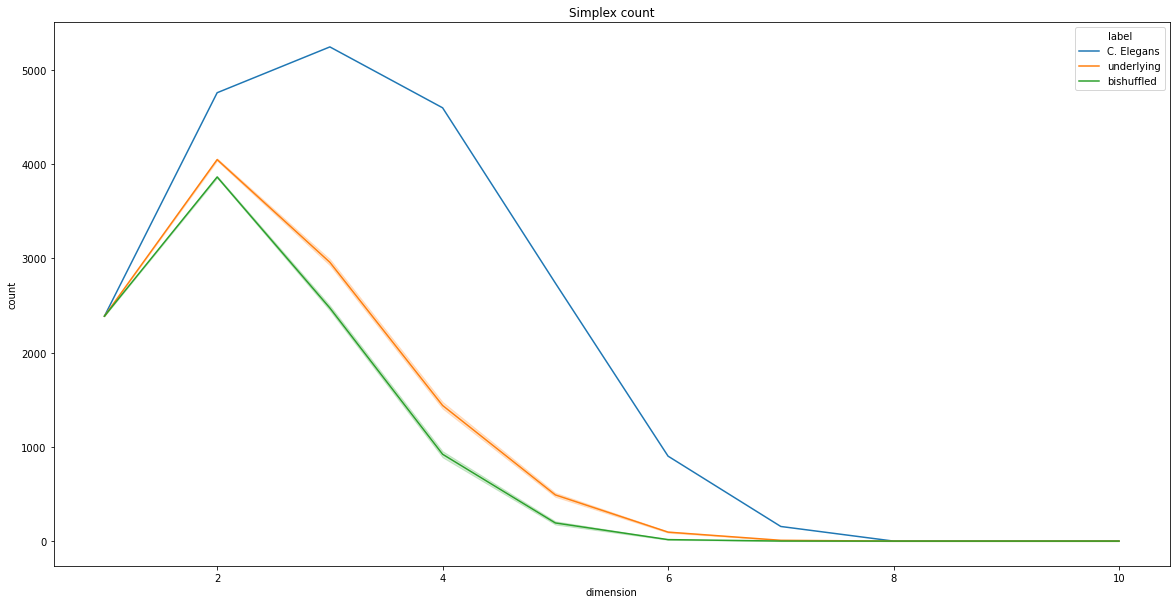

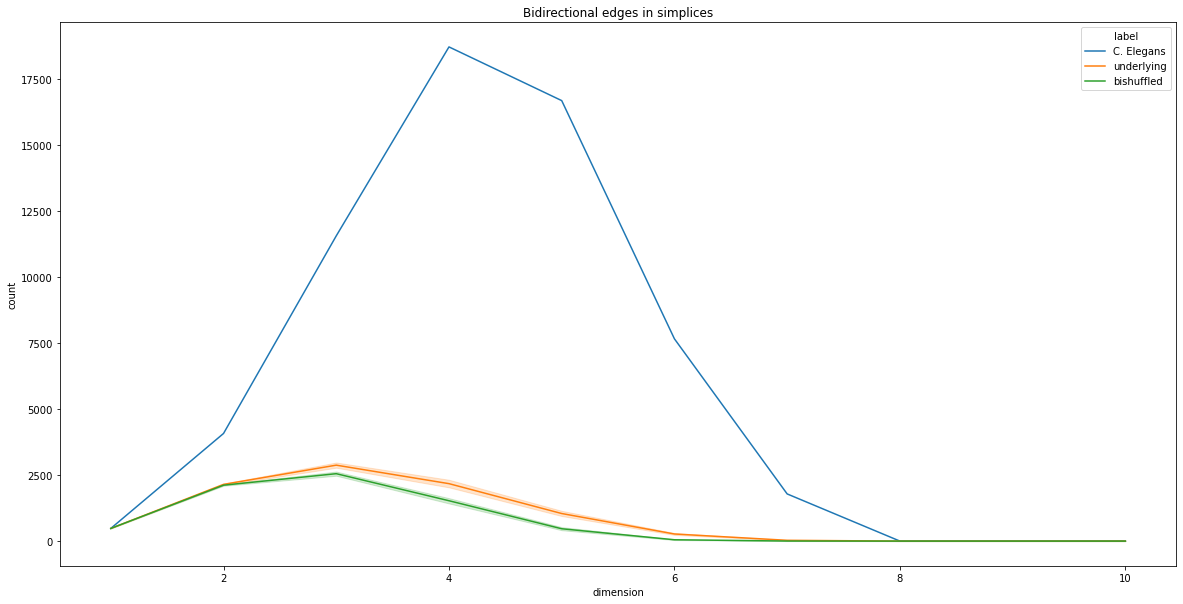

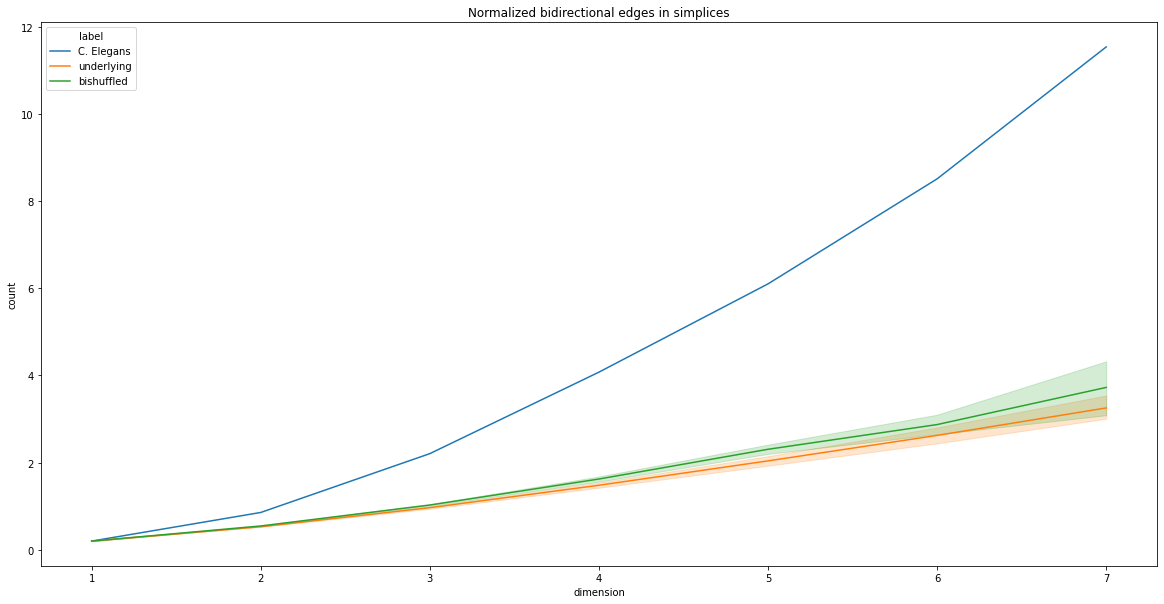

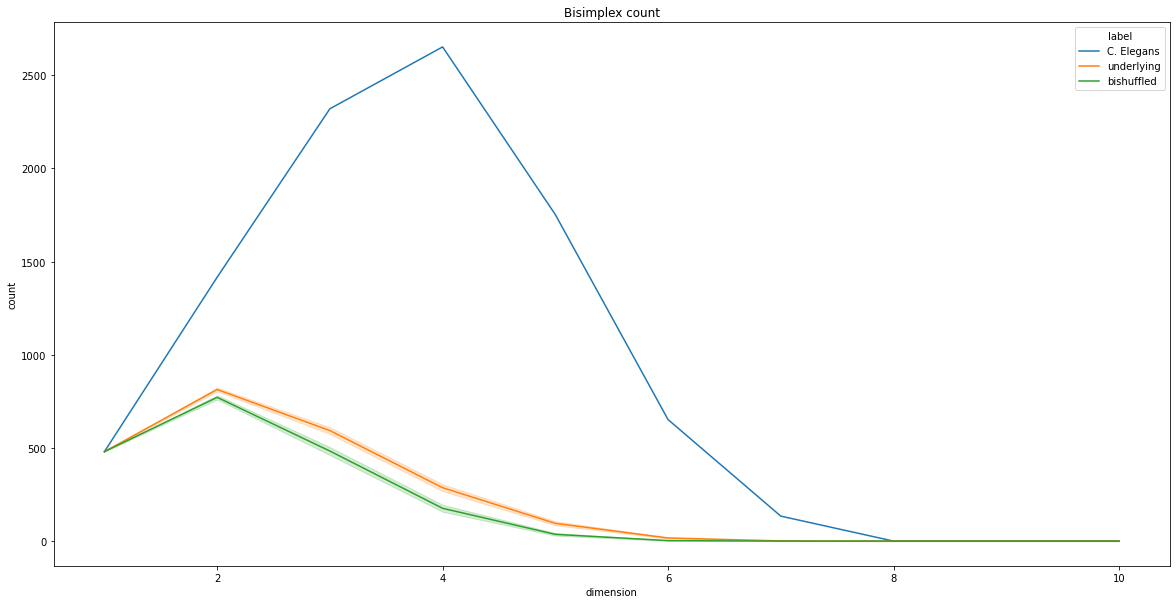

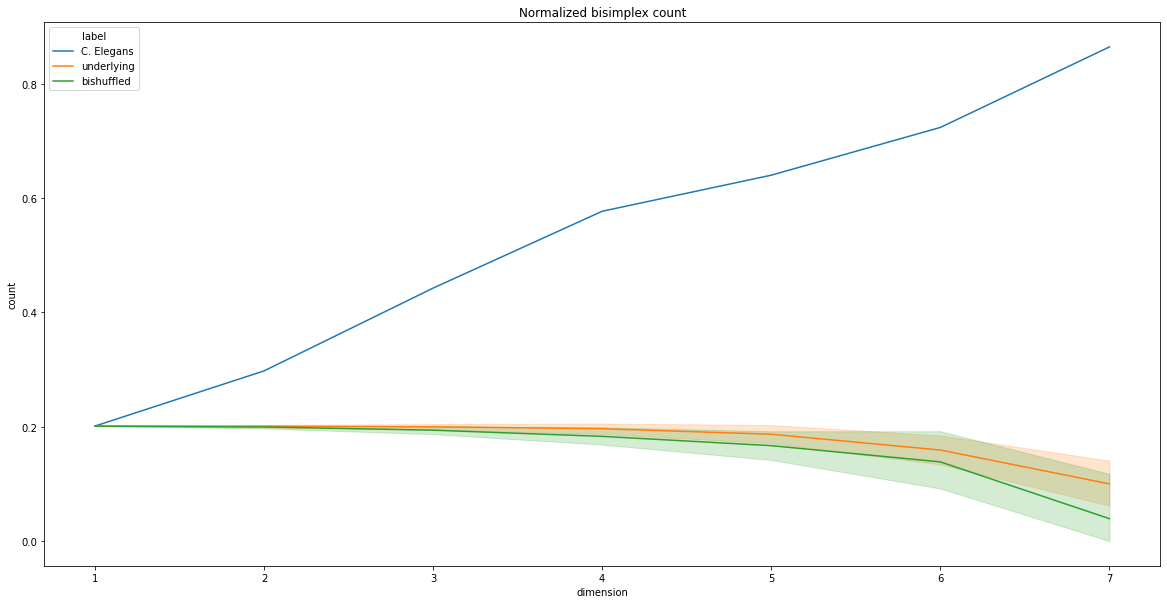

In [13]:
for count,title in zip(func_list,title_list):
    df = pd.DataFrame()
    for path, label in zip(path_list, label_list):
        df = df.append(retrieve_sample_data(count, path, label, maximal = False))
    fig = plt.figure(figsize = [20,10])
    ax = fig.add_subplot()
    sns.lineplot(x = "dimension", y = "count", data = df, hue = "label", ax = ax)
    ax.set_title(title)
    fig.savefig(title.replace(" ", "_") + "_worm")
    

In [14]:
title_list_maximal = ["Maximal simplex count",
             "Bidirectional edges in maximal simplices", "Normalized bidirectional edges in maximal simplices",
             "Bisimplex count - maximal", "Normalized bisimplex count - maximal"]

<ipython-input-7-1b48c585f80e>:2: RuntimeWarning: invalid value encountered in double_scalars
  return biedge_extractor(matrix)/simplex_count_extractor(matrix)
<ipython-input-7-1b48c585f80e>:2: RuntimeWarning: invalid value encountered in double_scalars
  return biedge_extractor(matrix)/simplex_count_extractor(matrix)
<ipython-input-7-1b48c585f80e>:2: RuntimeWarning: invalid value encountered in double_scalars
  return biedge_extractor(matrix)/simplex_count_extractor(matrix)
<ipython-input-8-31a2df3f6081>:2: RuntimeWarning: invalid value encountered in double_scalars
  return bisimplex_count_extractor(matrix)/simplex_count_extractor(matrix)
<ipython-input-8-31a2df3f6081>:2: RuntimeWarning: invalid value encountered in double_scalars
  return bisimplex_count_extractor(matrix)/simplex_count_extractor(matrix)
<ipython-input-8-31a2df3f6081>:2: RuntimeWarning: invalid value encountered in double_scalars
  return bisimplex_count_extractor(matrix)/simplex_count_extractor(matrix)


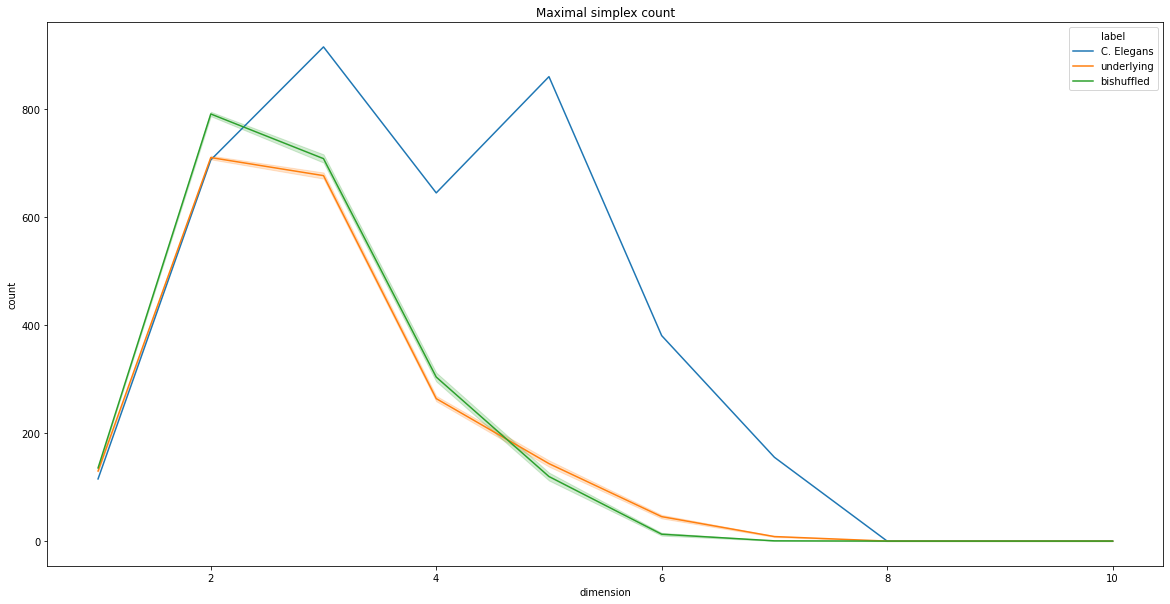

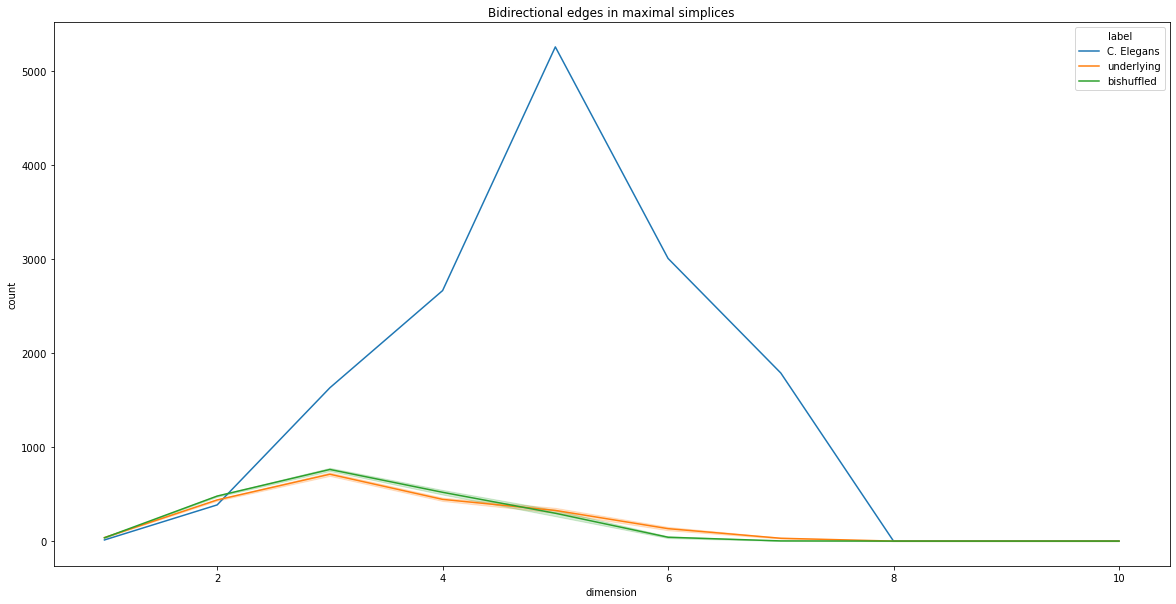

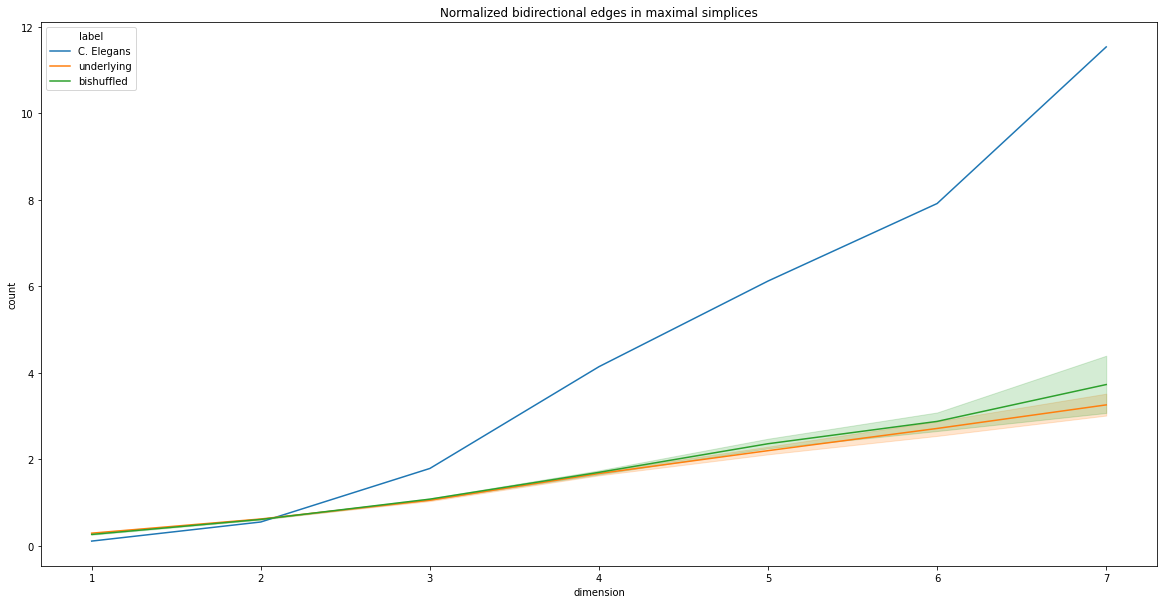

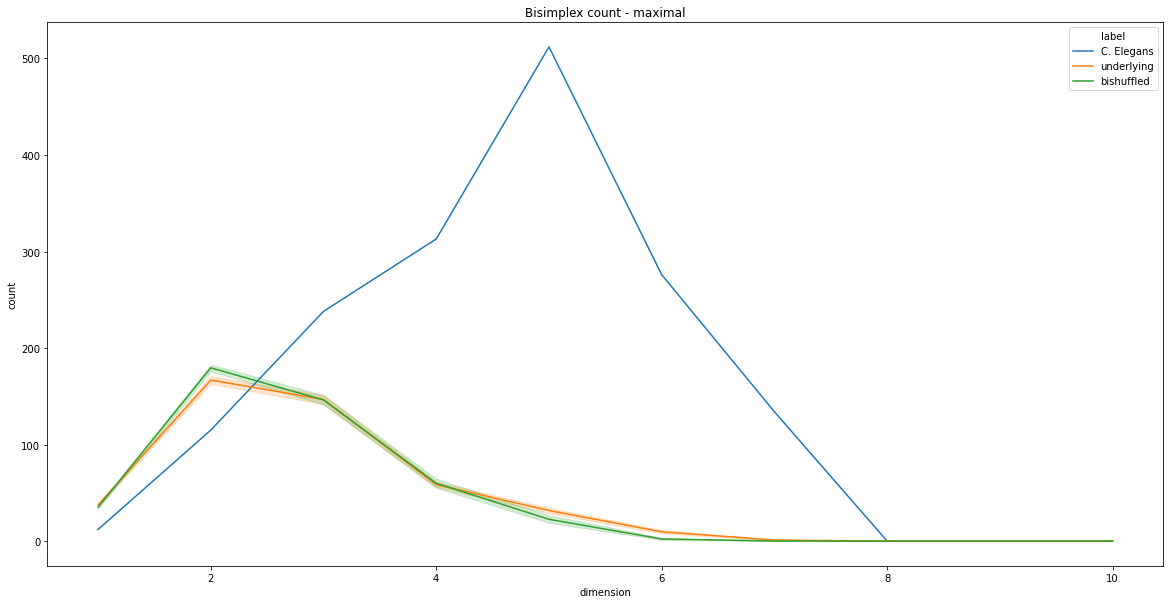

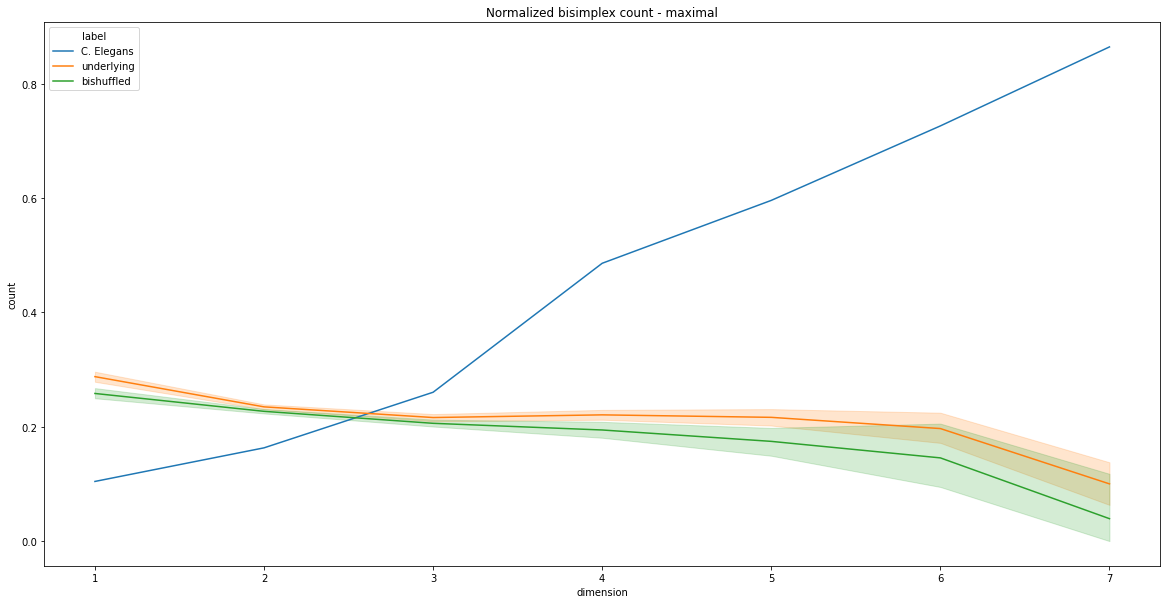

In [15]:
for count,title in zip(func_list,title_list_maximal):
    df = pd.DataFrame()
    for path, label in zip(path_list, label_list):
        df = df.append(retrieve_sample_data(count, path, label, maximal = True))
    fig = plt.figure(figsize = [20,10])
    ax = fig.add_subplot()
    sns.lineplot(x = "dimension", y = "count", data = df, hue = "label", ax = ax)
    ax.set_title(title)
    fig.savefig(title.replace(" ", "_") + "_worm_maximal")
    

In [16]:
func_list = [simplex_count_extractor,
             biedge_extractor, normalized_biedge_extractor,
             bisimplex_count_extractor, normalized_bisimplex_extractor]

In [17]:
path_list = [Path("data/bcounts/column"),
             Path("data/bcounts/underlying_1"),
             Path("data/bcounts/bshuffled_1")]

In [18]:
label_list = ["Microcircuit", "underlying", "bishuffled"]

In [19]:
title_list = ["Simplex count",
             "Bidirectional edges in simplices", "Normalized bidirectional edges in simplices",
             "Bisimplex count", "Normalized bisimplex count"]

<ipython-input-7-1b48c585f80e>:2: RuntimeWarning: invalid value encountered in double_scalars
  return biedge_extractor(matrix)/simplex_count_extractor(matrix)
<ipython-input-7-1b48c585f80e>:2: RuntimeWarning: invalid value encountered in double_scalars
  return biedge_extractor(matrix)/simplex_count_extractor(matrix)
<ipython-input-7-1b48c585f80e>:2: RuntimeWarning: invalid value encountered in double_scalars
  return biedge_extractor(matrix)/simplex_count_extractor(matrix)
<ipython-input-8-31a2df3f6081>:2: RuntimeWarning: invalid value encountered in double_scalars
  return bisimplex_count_extractor(matrix)/simplex_count_extractor(matrix)
<ipython-input-8-31a2df3f6081>:2: RuntimeWarning: invalid value encountered in double_scalars
  return bisimplex_count_extractor(matrix)/simplex_count_extractor(matrix)
<ipython-input-8-31a2df3f6081>:2: RuntimeWarning: invalid value encountered in double_scalars
  return bisimplex_count_extractor(matrix)/simplex_count_extractor(matrix)


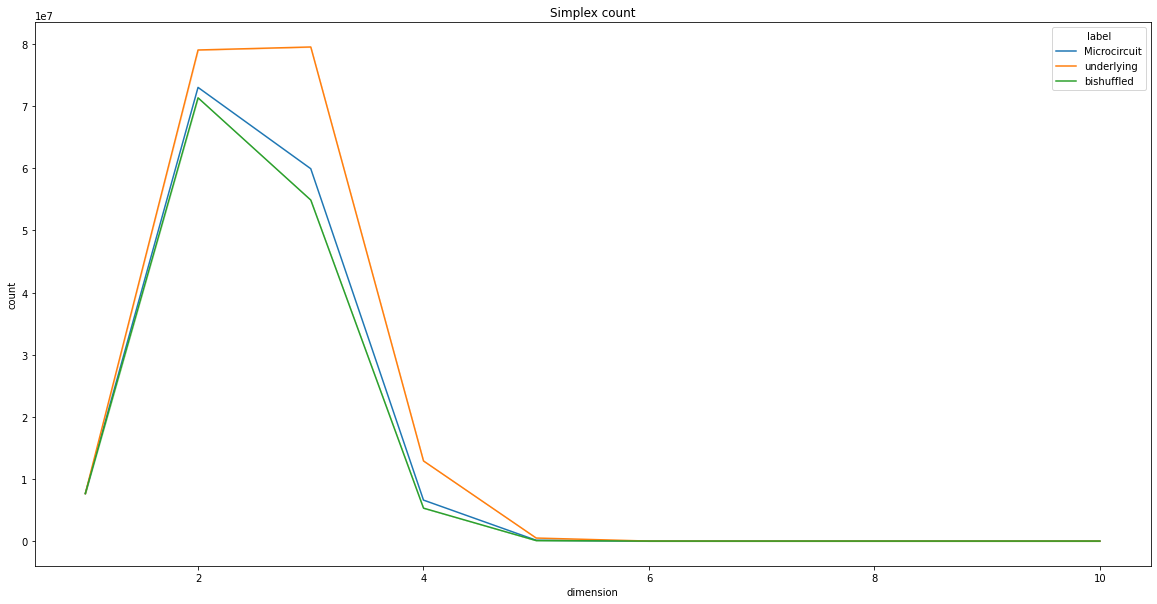

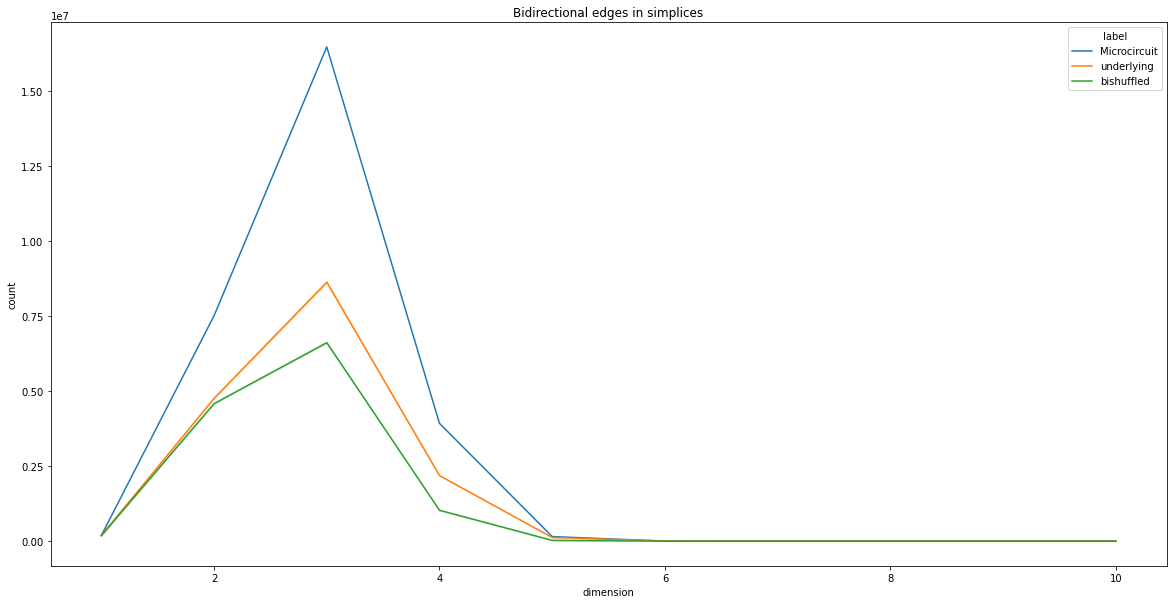

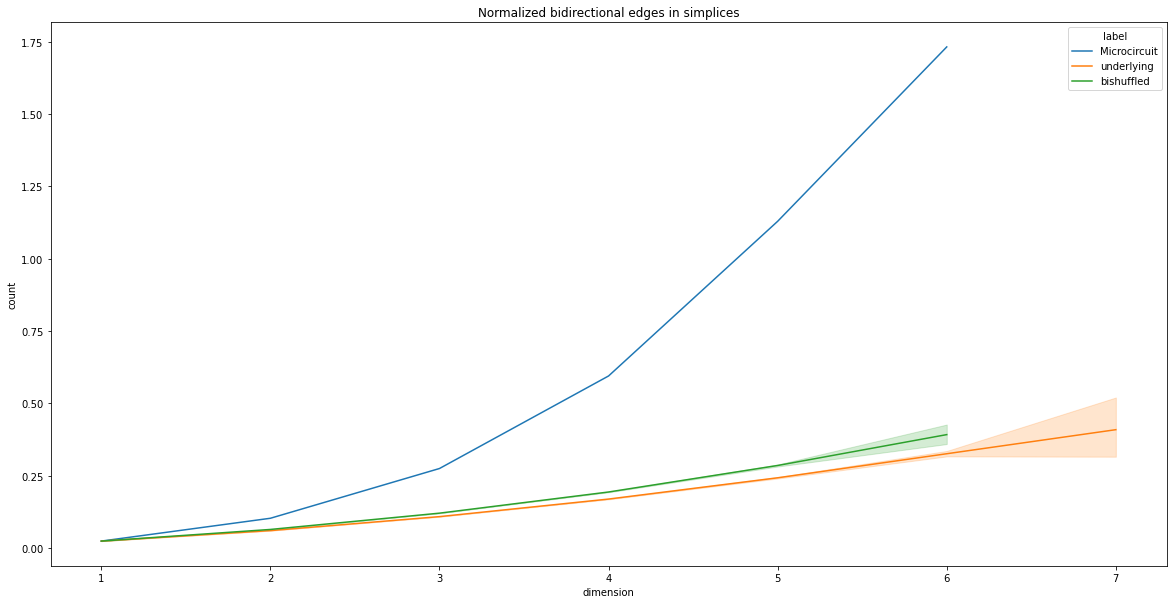

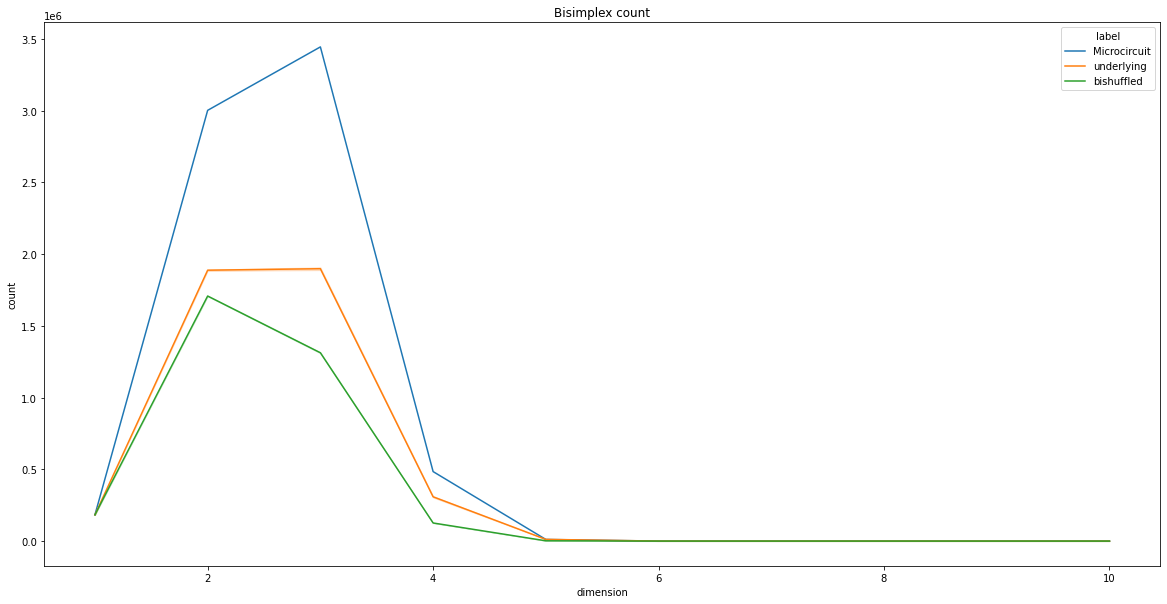

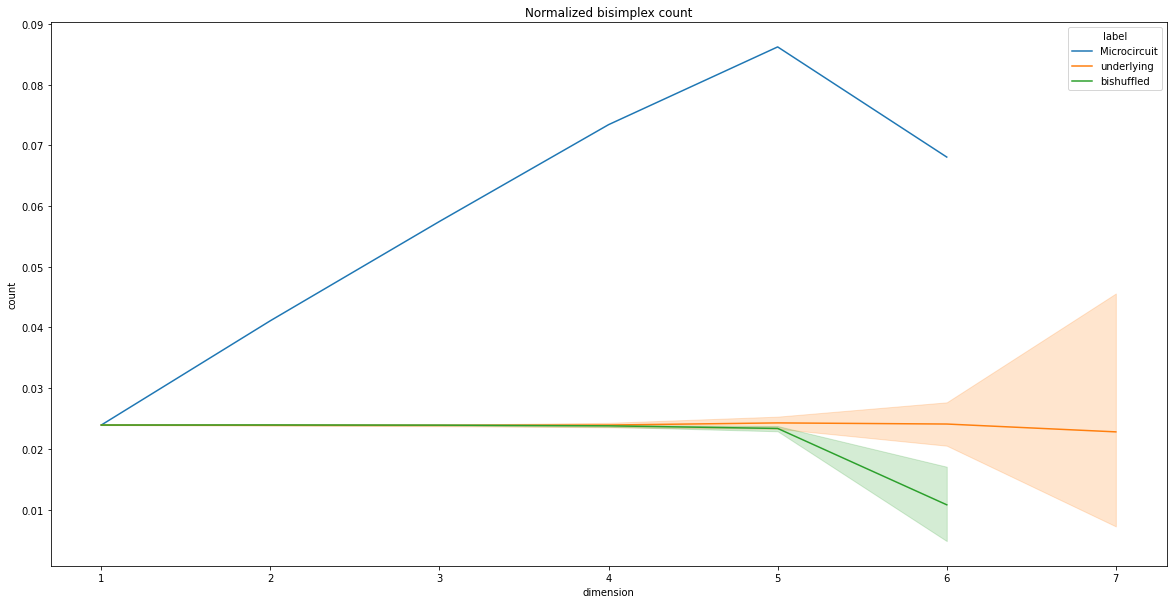

In [20]:
for count,title in zip(func_list,title_list):
    df = pd.DataFrame()
    for path, label in zip(path_list, label_list):
        df = df.append(retrieve_sample_data(count, path, label, maximal = False))
    fig = plt.figure(figsize = [20,10])
    ax = fig.add_subplot()
    sns.lineplot(x = "dimension", y = "count", data = df, hue = "label", ax = ax)
    ax.set_title(title)
    fig.savefig(title.replace(" ", "_") + "_bbpv5")
    

In [21]:
title_list_maximal = ["Maximal simplex count",
             "Bidirectional edges in maximal simplices", "Normalized bidirectional edges in maximal simplices",
             "Bisimplex count - maximal", "Normalized bisimplex count - maximal"]

<ipython-input-7-1b48c585f80e>:2: RuntimeWarning: invalid value encountered in double_scalars
  return biedge_extractor(matrix)/simplex_count_extractor(matrix)
<ipython-input-7-1b48c585f80e>:2: RuntimeWarning: invalid value encountered in double_scalars
  return biedge_extractor(matrix)/simplex_count_extractor(matrix)
<ipython-input-7-1b48c585f80e>:2: RuntimeWarning: invalid value encountered in double_scalars
  return biedge_extractor(matrix)/simplex_count_extractor(matrix)
<ipython-input-8-31a2df3f6081>:2: RuntimeWarning: invalid value encountered in double_scalars
  return bisimplex_count_extractor(matrix)/simplex_count_extractor(matrix)
<ipython-input-8-31a2df3f6081>:2: RuntimeWarning: invalid value encountered in double_scalars
  return bisimplex_count_extractor(matrix)/simplex_count_extractor(matrix)
<ipython-input-8-31a2df3f6081>:2: RuntimeWarning: invalid value encountered in double_scalars
  return bisimplex_count_extractor(matrix)/simplex_count_extractor(matrix)


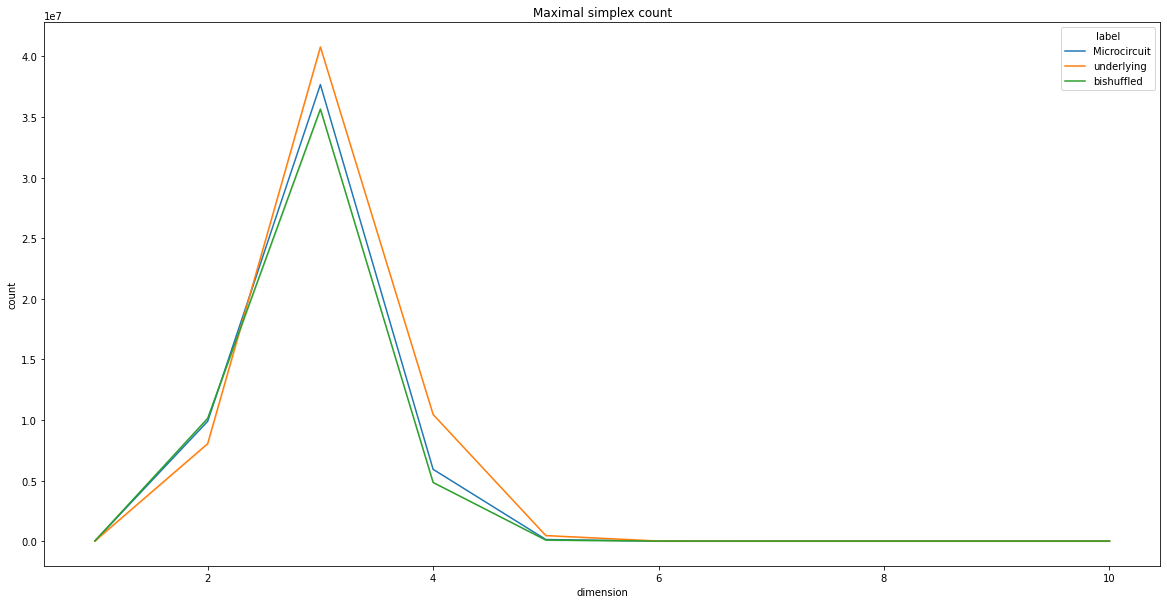

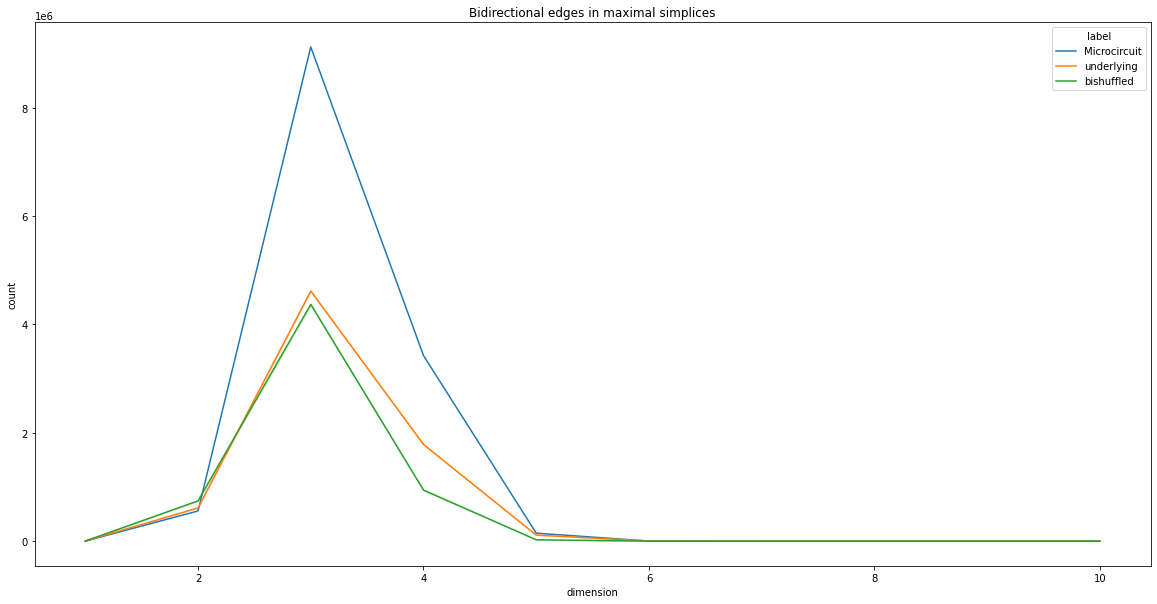

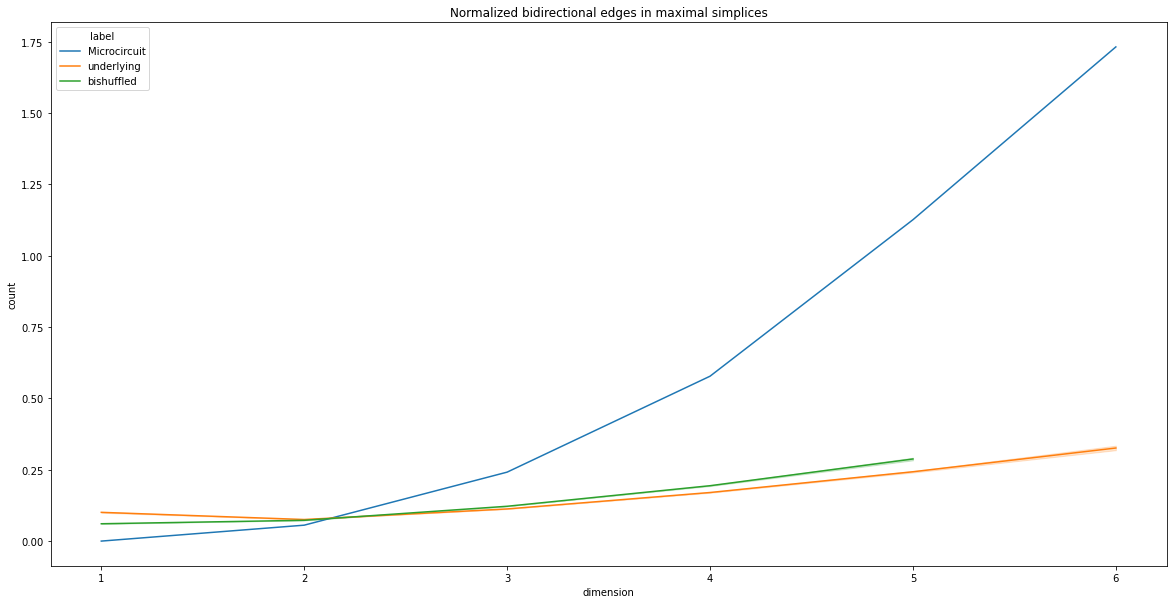

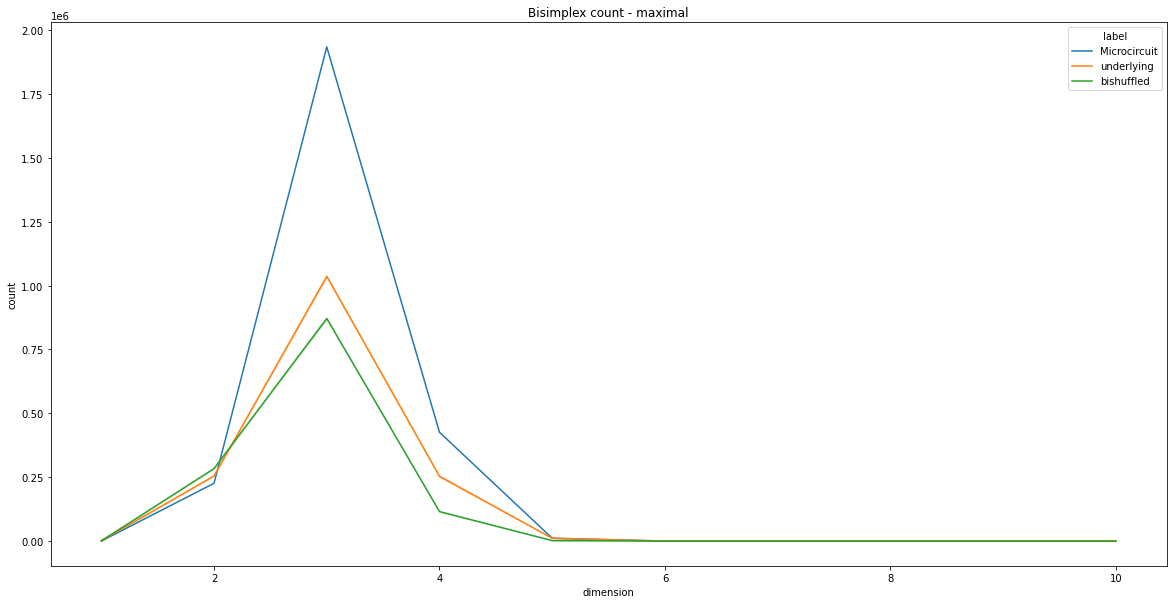

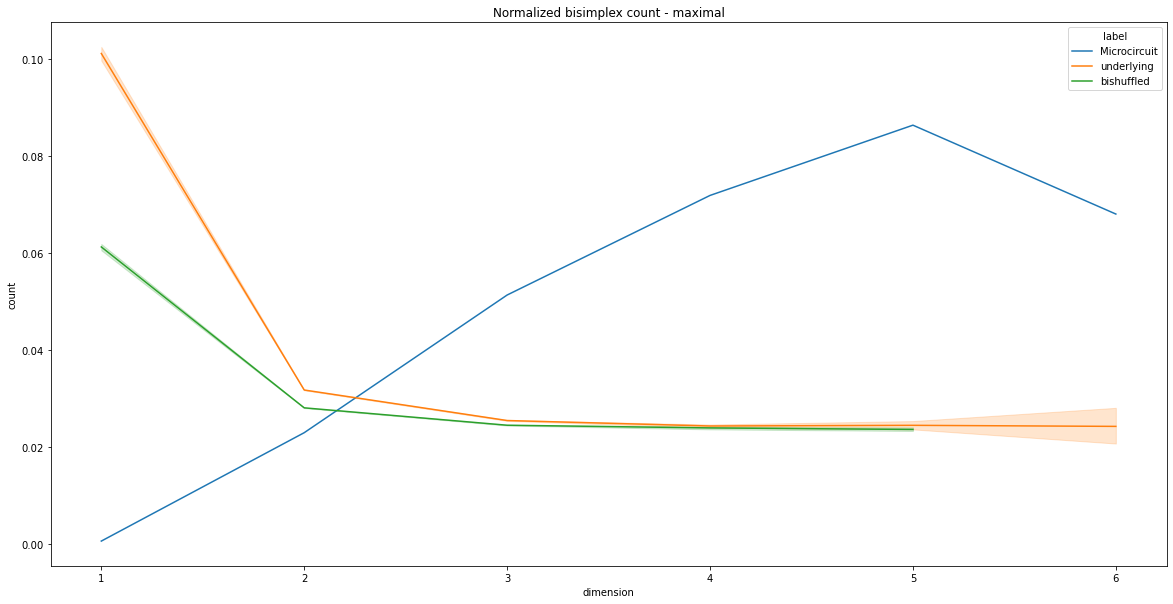

In [22]:
for count,title in zip(func_list,title_list_maximal):
    df = pd.DataFrame()
    for path, label in zip(path_list, label_list):
        df = df.append(retrieve_sample_data(count, path, label, maximal = True))
    fig = plt.figure(figsize = [20,10])
    ax = fig.add_subplot()
    sns.lineplot(x = "dimension", y = "count", data = df, hue = "label", ax = ax)
    ax.set_title(title)
    fig.savefig(title.replace(" ", "_") + "_bbpv5_maximal")
    

<ipython-input-7-1b48c585f80e>:2: RuntimeWarning: invalid value encountered in double_scalars
  return biedge_extractor(matrix)/simplex_count_extractor(matrix)
<ipython-input-7-1b48c585f80e>:2: RuntimeWarning: invalid value encountered in double_scalars
  return biedge_extractor(matrix)/simplex_count_extractor(matrix)


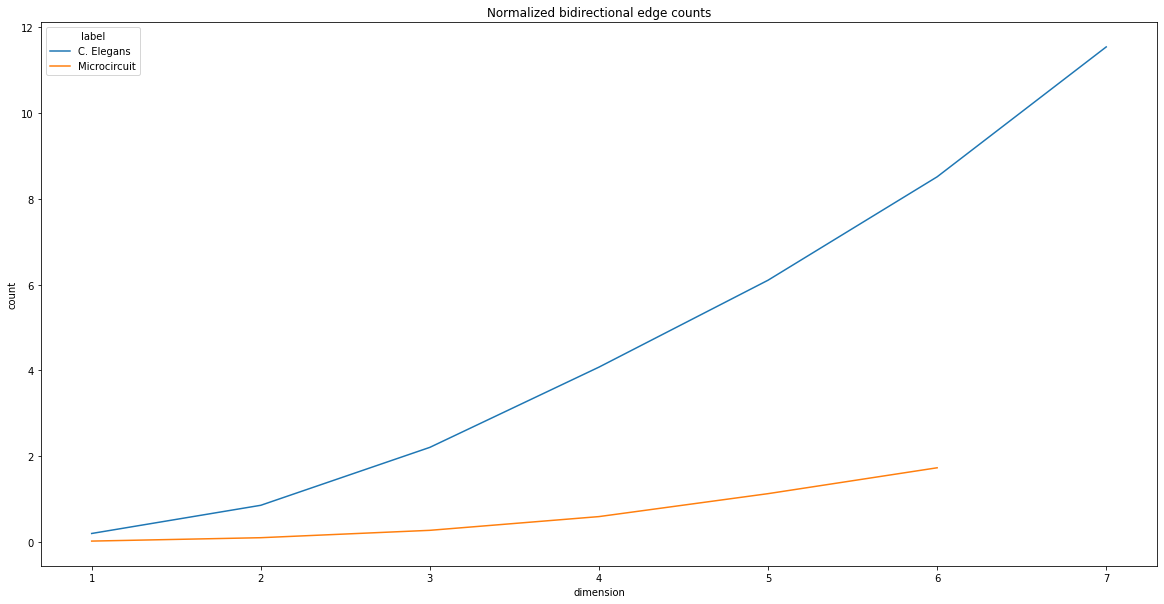

In [23]:
df = pd.DataFrame()
worm_path = Path("data/worm/full")
column_path = Path("data/bcounts/column")
df = df.append(retrieve_sample_data(normalized_biedge_extractor, worm_path, "C. Elegans", maximal = False))
df = df.append(retrieve_sample_data(normalized_biedge_extractor, column_path, "Microcircuit", maximal = False))
fig = plt.figure(figsize = [20,10])
ax = fig.add_subplot()
sns.lineplot(x = "dimension", y = "count", data = df, hue = "label", ax = ax)
ax.set_title("Normalized bidirectional edge counts")
fig.savefig("Normalized_bedge_count_comparison")

<ipython-input-7-1b48c585f80e>:2: RuntimeWarning: invalid value encountered in double_scalars
  return biedge_extractor(matrix)/simplex_count_extractor(matrix)
<ipython-input-7-1b48c585f80e>:2: RuntimeWarning: invalid value encountered in double_scalars
  return biedge_extractor(matrix)/simplex_count_extractor(matrix)


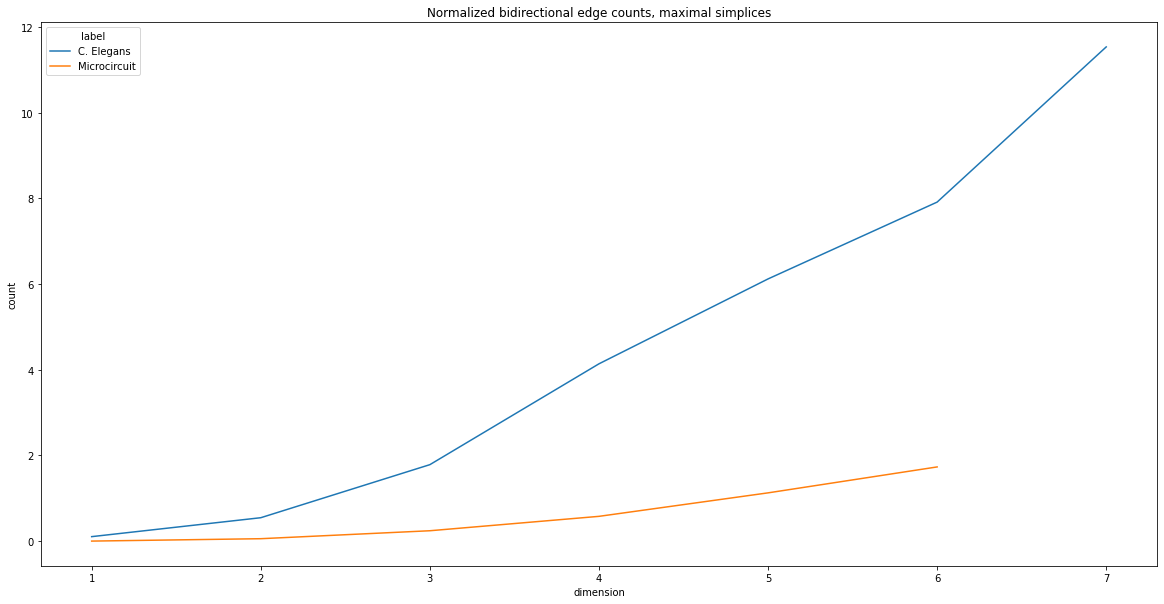

In [24]:
df = pd.DataFrame()
worm_path = Path("data/worm/full")
column_path = Path("data/bcounts/column")
df = df.append(retrieve_sample_data(normalized_biedge_extractor, worm_path, "C. Elegans", maximal = True))
df = df.append(retrieve_sample_data(normalized_biedge_extractor, column_path, "Microcircuit", maximal = True))
fig = plt.figure(figsize = [20,10])
ax = fig.add_subplot()
sns.lineplot(x = "dimension", y = "count", data = df, hue = "label", ax = ax)
ax.set_title("Normalized bidirectional edge counts, maximal simplices")
fig.savefig("Normalized_bedge_count_comparison_maximal")